# Clustering

In [253]:
import sklearn.datasets as data
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random
from sklearn.model_selection import train_test_split
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import scipy.cluster.hierarchy as hierarchy
import sklearn.neighbors as neighbors

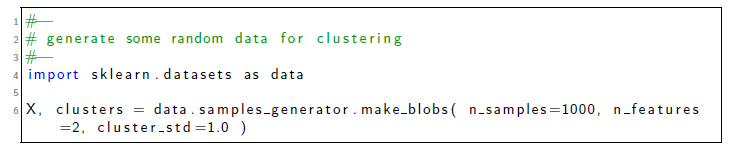

新版本已经没有samples_generator

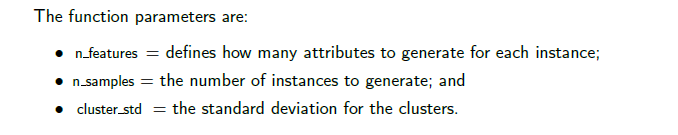

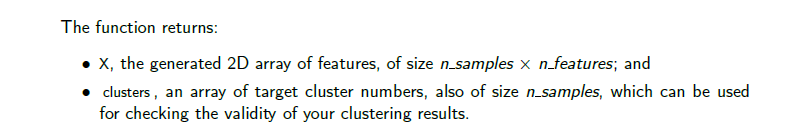

In [254]:
X, clusters = data.make_blobs(n_samples=1000,n_features=2,cluster_std=1,random_state=30)


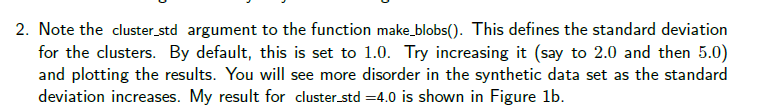

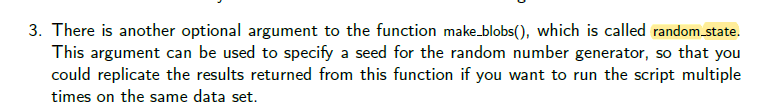

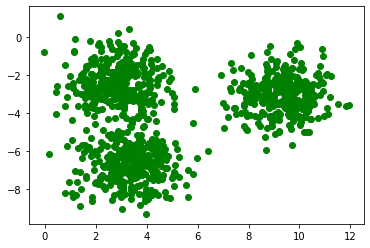

In [255]:
figure = plt.figure()
plt.scatter(X[:,0],X[:,1],color='green')
plt.show()

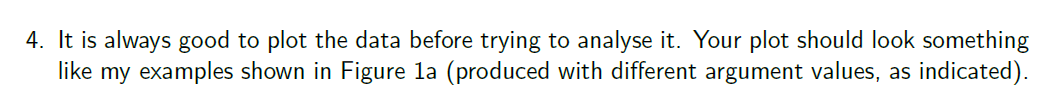

# 3 Write K-Means Yourself

In [256]:
k = 3
epsion = 0.01

In [257]:
# centroid = []
# X_large, X_small, y_large, y_small = train_test_split(X,clusters,random_state=0)
# n = X_small.shape[0]
# random.seed(10)
# for i in range(k):
#     centroid.append(X_small[random.randint(0,n-1)])
# centroid = np.array(centroid)

centroid = []
X_large, X_small, y_large, y_small = train_test_split(X,clusters,random_state=1000)
n = X.shape[0]
random.seed(20)
for i in range(k):
    centroid.append(X[random.randint(0,n-1)])
centroid = np.array(centroid)

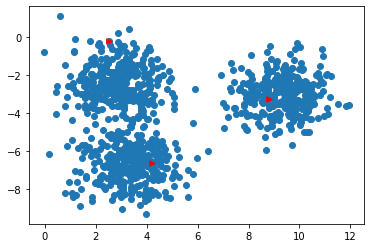

wc =  3654.823136968231
bc 13804.235201799049
score 3.7769913028541273


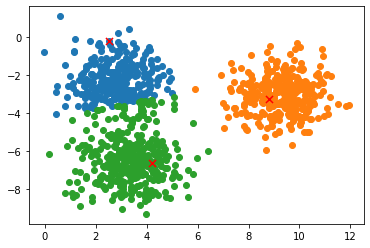

wc =  1940.9333935972988
bc 11979.425665606223
score 6.171992148274456


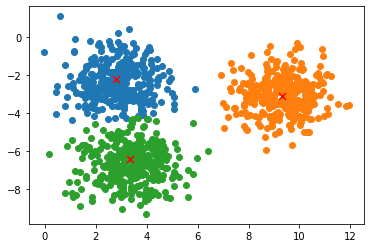

wc =  1892.5439420868279
bc 12145.938713444408
score 6.417784255012646


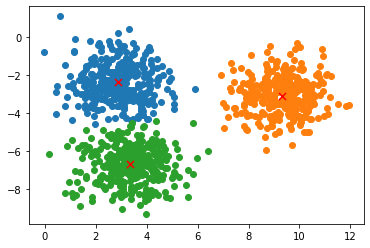

wc =  1890.9266710227248
bc 12166.428106088031
score 6.434108890910989


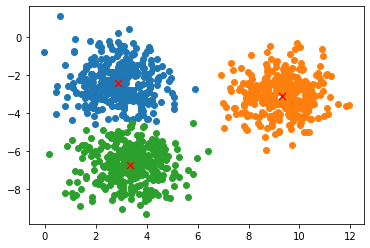

wc =  1890.8886906013063
bc 12169.102416548358
score 6.435652440587901


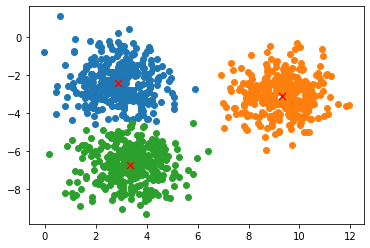

In [258]:
# previous_centroid = centroid

# fig = plt.figure()
# plt.scatter(X_small[:,0],X_small[:,1])
# plt.scatter(previous_centroid[:,0],previous_centroid[:,1],marker='>',color='red',s=30)
# plt.show()

# while True:
#     label = []
#     for point in X_small:
#         tmp = np.argmin(np.sum(np.square(point - centroid),axis=1))
#         label.append(tmp)
#     tmp_df = pd.DataFrame(X_small)
#     tmp_df['y'] = label
#     previous_centroid = centroid
#     centroid = np.array(tmp_df.groupby('y').mean())
#     print(abs(np.sum(previous_centroid - centroid)))
    
#     fig = plt.figure()
#     for i in list(set(label)):
#         plt.scatter(tmp_df[tmp_df['y']==i][0],tmp_df[tmp_df['y']==i][1])
#     plt.scatter(previous_centroid[:,0],previous_centroid[:,1],marker='x',color='red',s=50)
#     plt.show()
    
    
#     if abs(np.sum(previous_centroid - centroid))<epsion:
#         break


previous_centroid = centroid

fig = plt.figure()
plt.scatter(X[:,0],X[:,1])
plt.scatter(previous_centroid[:,0],previous_centroid[:,1],marker='>',color='red',s=30)
plt.show()

while True:
    label = []
    for point in X:
        tmp = np.argmin(np.sum(np.square(point - centroid),axis=1))
        label.append(tmp)
    tmp_df = pd.DataFrame(X)
    tmp_df['y'] = label
    previous_centroid = centroid
    centroid = np.array(tmp_df.groupby('y').mean())
#     print(abs(np.sum(previous_centroid - centroid)))
    
    
    wc = 0
    for i in range (previous_centroid.shape[0]):
#         print(np.trace(np.matmul(np.array(tmp_df[tmp_df['y']==i][[0,1]] - previous_centroid[i]),np.array(tmp_df[tmp_df['y']==i][[0,1]] - previous_centroid[i]).transpose())))
        
        wc +=np.trace(np.matmul(np.array(tmp_df[tmp_df['y']==i][[0,1]] - previous_centroid[i]),np.array(tmp_df[tmp_df['y']==i][[0,1]] - previous_centroid[i]).transpose()))
#         wc +=(np.trace(np.matmul(np.array(tmp_df[tmp_df['y']==i][[0,1]] - previous_centroid[i]),np.array(tmp_df[tmp_df['y']==i][[0,1]] - previous_centroid[i]).transpose())))/tmp_df[tmp_df['y']==i][[0,1]].shape[0]
        
    print('wc = ',wc)
    
    bc = 0
    avg_centroid = np.mean(X,axis=0).reshape(1,2)
    bc_tmp = np.sum(np.square(previous_centroid - avg_centroid),axis=1)
    for i in range(bc_tmp.shape[0]):
        bc += bc_tmp[i]*tmp_df[tmp_df['y']==i].shape[0]
    print('bc',bc)
    
    print('score',bc/wc)
    
    
    fig = plt.figure()
    for i in list(set(label)):
        plt.scatter(tmp_df[tmp_df['y']==i][0],tmp_df[tmp_df['y']==i][1])
    plt.scatter(previous_centroid[:,0],previous_centroid[:,1],marker='x',color='red',s=50)
    plt.show()
    
    
    if abs(np.sum(previous_centroid - centroid))<epsion:
        break
        

## Compute the Within Cluster score

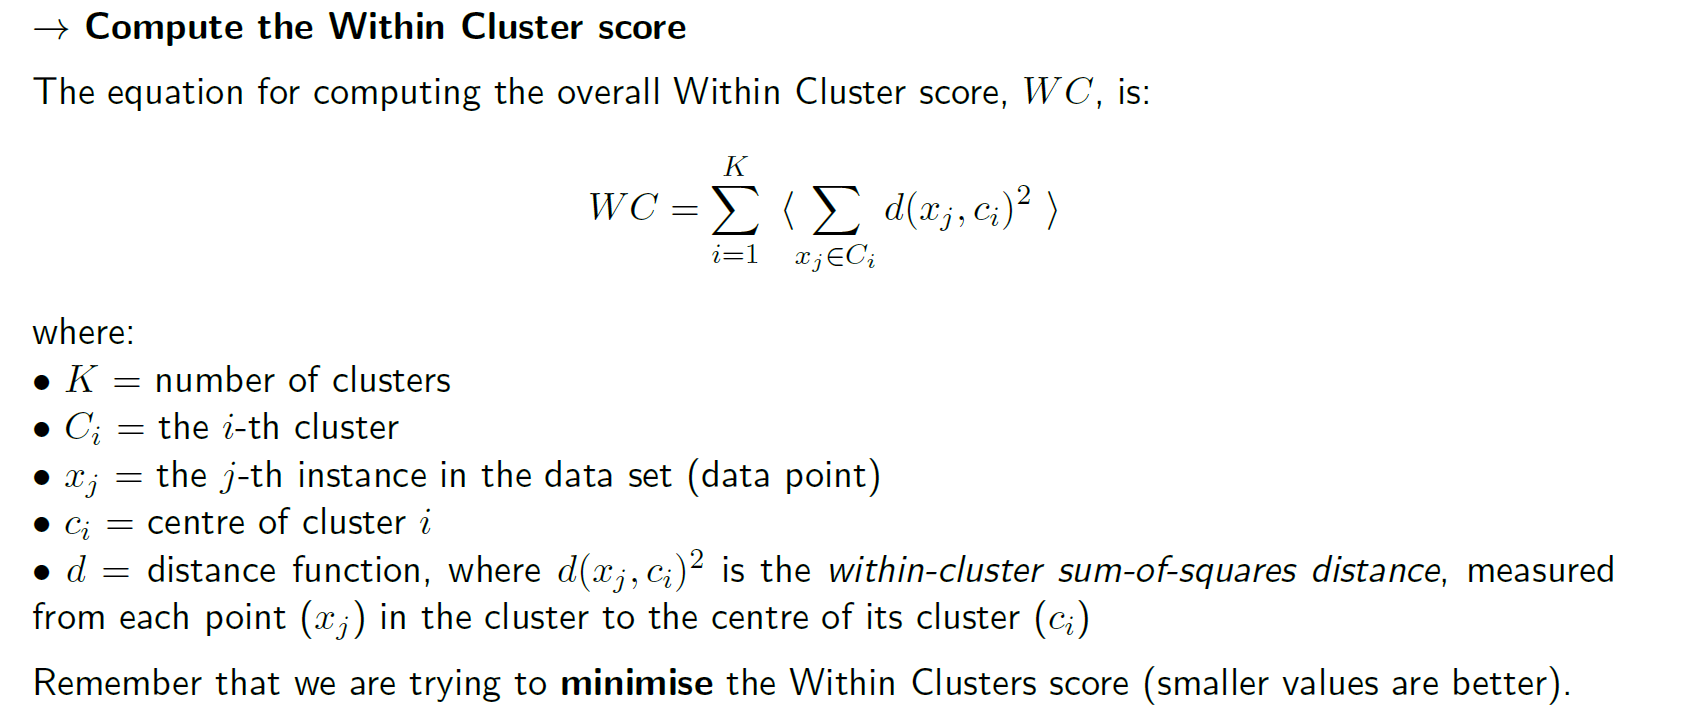

In [259]:
wc = 0
for i in range (centroid.shape[0]):
    print(np.trace(np.matmul(np.array(tmp_df[tmp_df['y']==i][[0,1]] - centroid[i]),np.array(tmp_df[tmp_df['y']==i][[0,1]] - centroid[i]).transpose())))
    wc +=np.trace(np.matmul(np.array(tmp_df[tmp_df['y']==i][[0,1]] - centroid[i]),np.array(tmp_df[tmp_df['y']==i][[0,1]] - centroid[i]).transpose()))
#     wc +=(np.trace(np.matmul(np.array(tmp_df[tmp_df['y']==i][[0,1]] - centroid[i]),np.array(tmp_df[tmp_df['y']==i][[0,1]] - centroid[i]).transpose())))/tmp_df[tmp_df['y']==i][[0,1]].shape[0]

print('wc',wc)

664.6807743838284
602.284918283081
623.9229979343968
wc 1890.8886906013063


## Compute the Between Clusters score

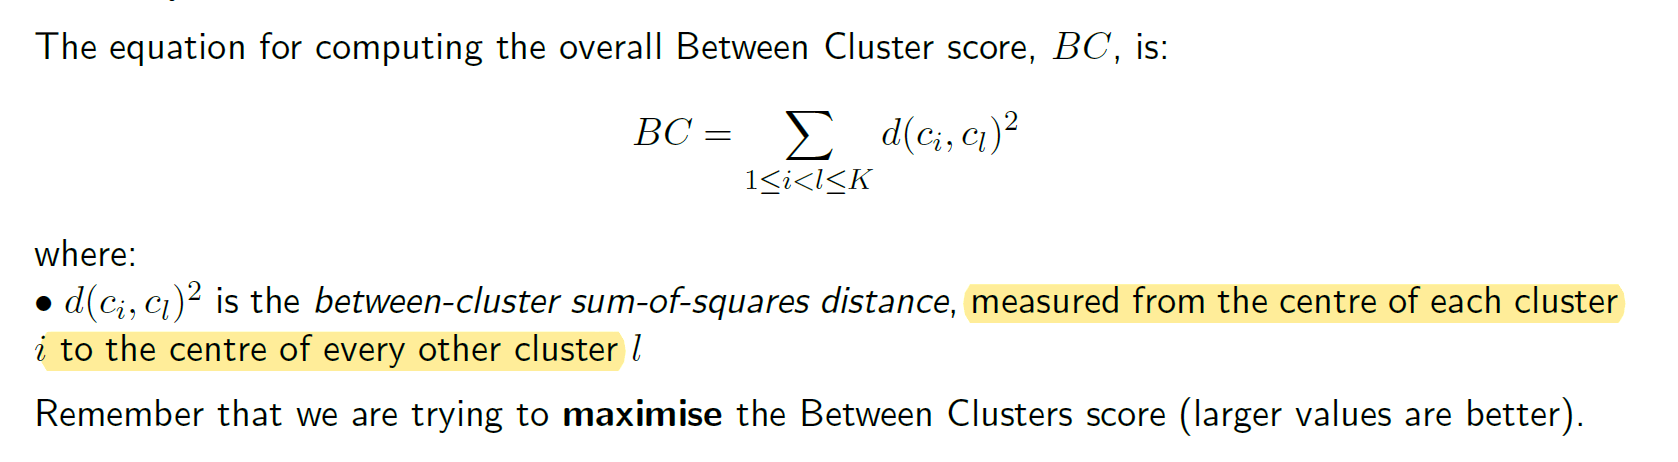

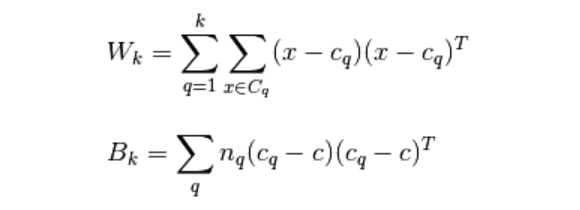

bc 正确算法，全局算平均值，用各自簇的centroid到中心的距离乘以各自cluster中的数量来算bc

In [260]:
bc = 0
avg_centroid = np.mean(X,axis=0).reshape(1,2)
bc_tmp = np.sum(np.square(centroid - avg_centroid),axis=1)
for i in range(bc_tmp.shape[0]):
    bc += bc_tmp[i]*tmp_df[tmp_df['y']==i].shape[0]
# for i in range(k):
#     centroid
#     for j in range(i+1,centroid.shape[0]):
#         bc += np.sum(np.square(centroid[i] - centroid[j]),axis=0)
print('bc',bc)

bc 12169.102416548358


In [261]:
# bc_tmp[0]

In [262]:
# np.mean(centroid,axis=0)


In [263]:
# centroid

In [264]:
# ((2.67611339 - (-0.08093232))**2+(-3.37916031-(-5.52042275))**2)*333
# ((5.46901266 -2.67611339)**2 +(-9.5834314-(-3.37916031))**2)*334
# ((2.64025982- 2.67611339)**2 +(4.96637323-(-3.37916031))**2)*333

In [265]:
# ((5.46901266 -2.67611339)**2 +(-9.5834314-(-3.37916031))**2)*334


In [266]:
# ((2.64025982- 2.67611339)**2 +(4.96637323-(-3.37916031))**2)*333

In [267]:
# 4058.039859366724+15461.950874252494+23193.188776733645

## Compute the Overall Clustering score

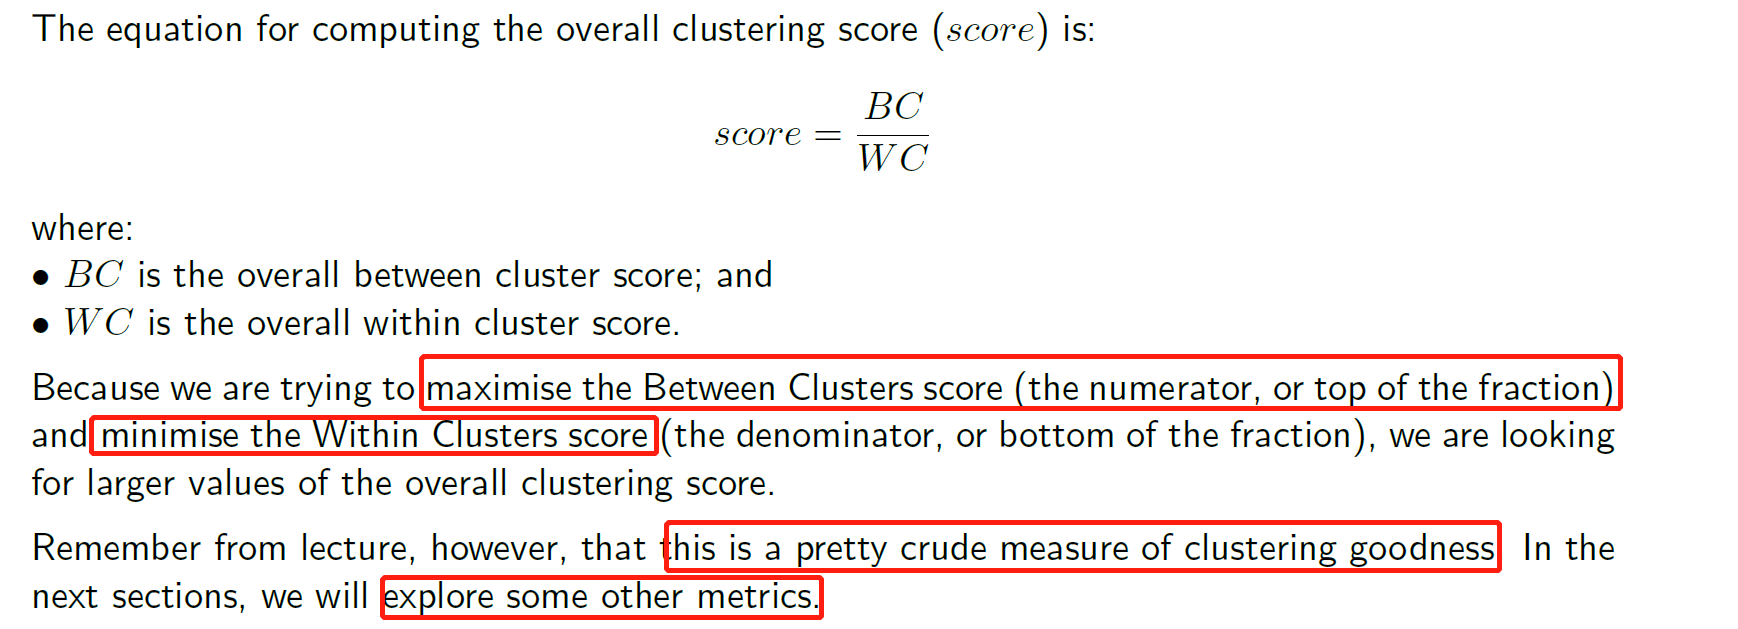

In [268]:
score = bc /wc
score

6.435652440587901

## Try different values of K

bc 0.0
wc 14059.991107149663
score 0.0


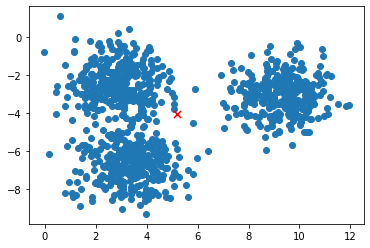

bc 9020.614338948375
wc 5039.376768201288
score 1.7900257817333465


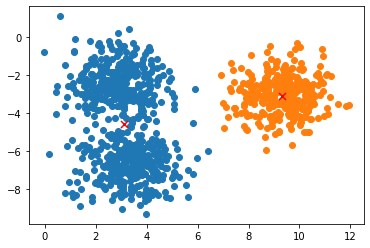

bc 12169.102416548358
wc 1890.8886906013063
score 6.435652440587901


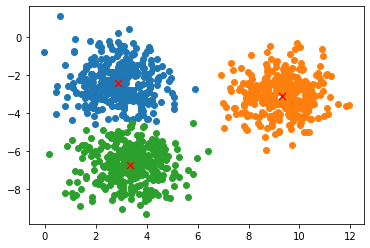

bc 12365.239985055661
wc 1694.5798740729606
score 7.296935467158318


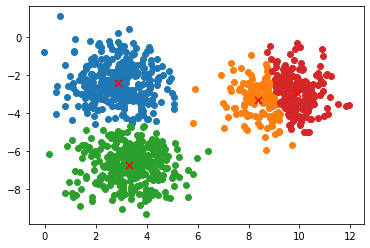

bc 12568.38716571525
wc 1491.6039414344139
score 8.426088733466843


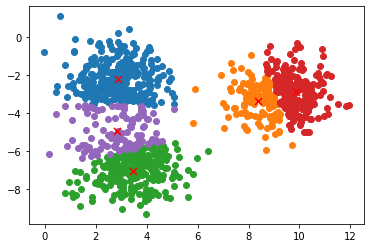

bc 12718.979775906622
wc 1335.3115087204867
score 9.525103088562547


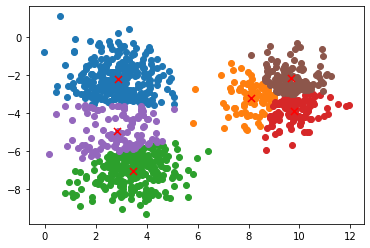

bc 12736.462228281041
wc 1302.0096665620229
score 9.782156427388033


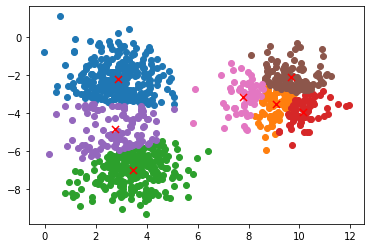

bc 13013.992912474165
wc 1056.0843790840727
score 12.322872272536614


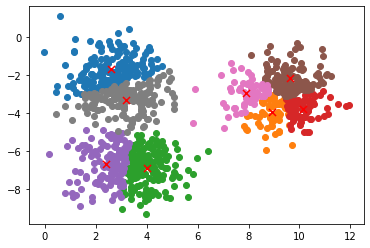

bc 13050.910821643243
wc 1018.8534732778512
score 12.80940897188671


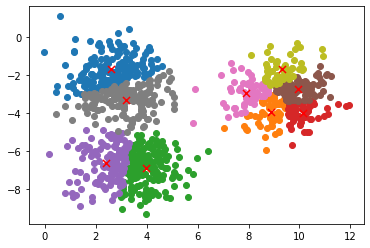

bc 13199.304561464452
wc 865.9199927696042
score 15.243099445304527


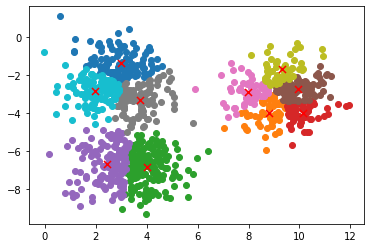

In [157]:
bc_list = []
wc_list = []

for k in range(1,11):

    # k = 3
    epsion = 0.01

    centroid = []
    X_large, X_small, y_large, y_small = train_test_split(X,clusters,random_state=2)
    n = X.shape[0]
    random.seed(20)
    for i in range(k):
        centroid.append(X[random.randint(0,n-1)])
    centroid = np.array(centroid)



    previous_centroid = centroid

    while True:
        label = []
        for point in X:
            tmp = np.argmin(np.sum(np.square(point - centroid),axis=1))
            label.append(tmp)
        tmp_df = pd.DataFrame(X)
        tmp_df['y'] = label
        previous_centroid = centroid
        centroid = np.array(tmp_df.groupby('y').mean())
    #     print(abs(np.sum(previous_centroid - centroid)))


        wc = 0
        for i in range (previous_centroid.shape[0]):
    #         print(np.trace(np.matmul(np.array(tmp_df[tmp_df['y']==i][[0,1]] - previous_centroid[i]),np.array(tmp_df[tmp_df['y']==i][[0,1]] - previous_centroid[i]).transpose())))
#             wc +=np.trace(np.matmul(np.array(tmp_df[tmp_df['y']==i][[0,1]] - previous_centroid[i]),np.array(tmp_df[tmp_df['y']==i][[0,1]] - previous_centroid[i]).transpose()))
            wc +=(np.trace(np.matmul(np.array(tmp_df[tmp_df['y']==i][[0,1]] - previous_centroid[i]),np.array(tmp_df[tmp_df['y']==i][[0,1]] - previous_centroid[i]).transpose())))
#         print('wc = ',wc)

        bc = 0
        avg_centroid = np.mean(X,axis=0).reshape(1,2)
        bc_tmp = np.sum(np.square(previous_centroid - avg_centroid),axis=1)
        for i in range(bc_tmp.shape[0]):
            bc += bc_tmp[i]*tmp_df[tmp_df['y']==i].shape[0]
#         print('bc',bc)

        if abs(np.sum(previous_centroid - centroid))<epsion:
            break
    bc_list.append(bc)
    wc_list.append(wc)
    print('bc',bc)
    print('wc',wc)
    print('score',bc/wc)
    fig = plt.figure()
    for i in list(set(label)):
        plt.scatter(tmp_df[tmp_df['y']==i][0],tmp_df[tmp_df['y']==i][1])
    plt.scatter(previous_centroid[:,0],previous_centroid[:,1],marker='x',color='red',s=50)
    plt.show()

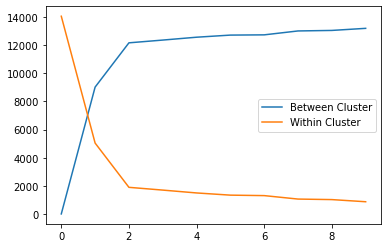

In [158]:
fig = plt.figure()
plt.plot(bc_list)
plt.plot(wc_list)
plt.legend(['Between Cluster','Within Cluster'])
plt.show()

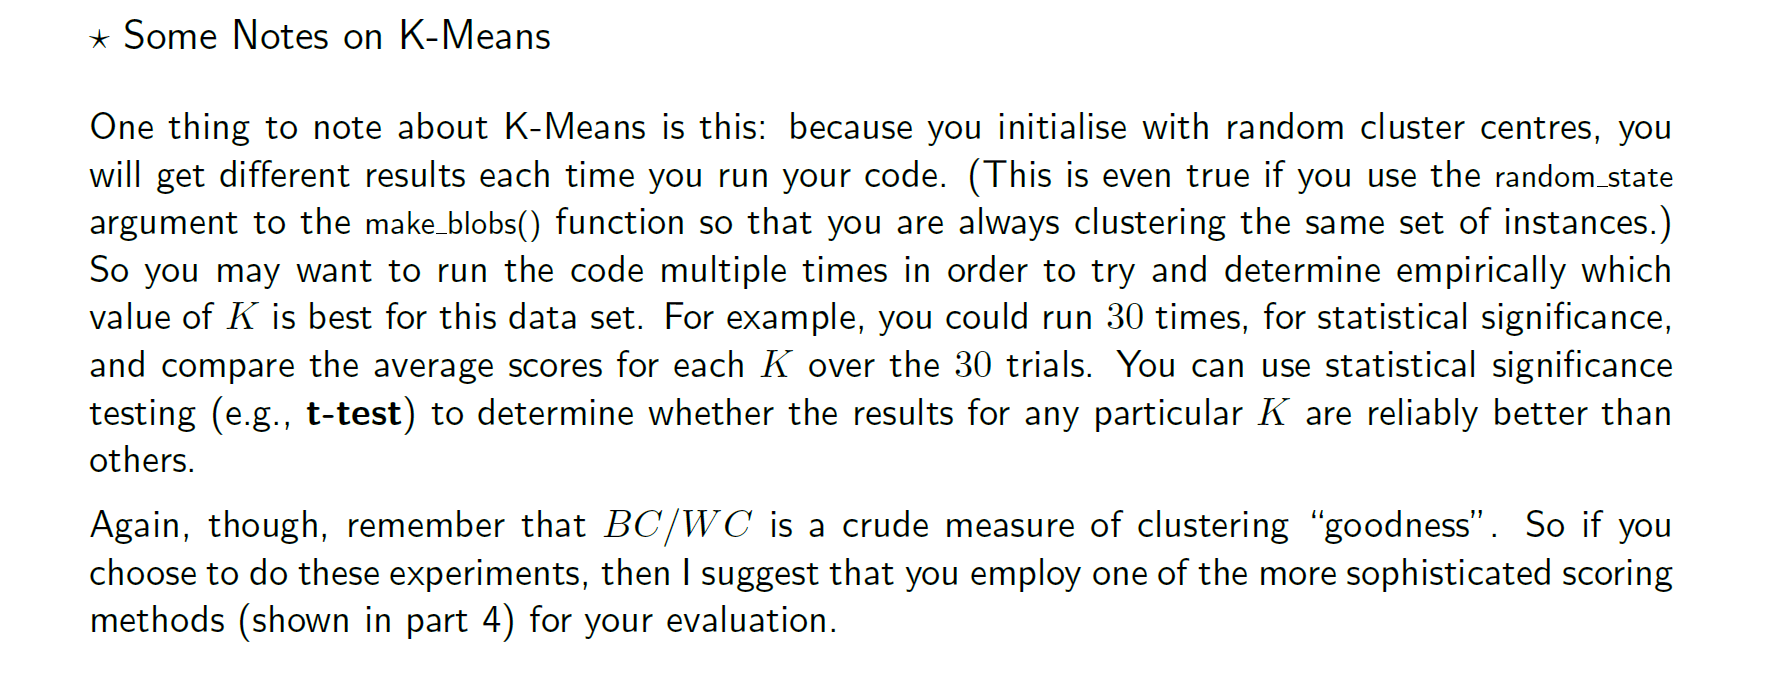

# 4 Use K-Means from scikit-learn

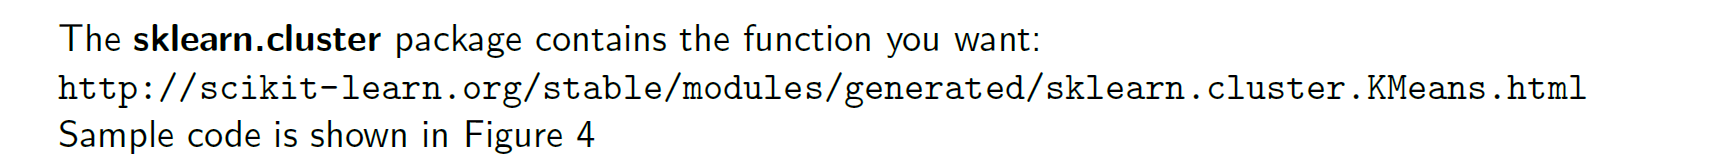

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [269]:
#initialise the KMeans clustering object
K = 3
km = cluster.KMeans(n_clusters=K)
# compute the clusters:
km.fit(X)

KMeans(n_clusters=3)

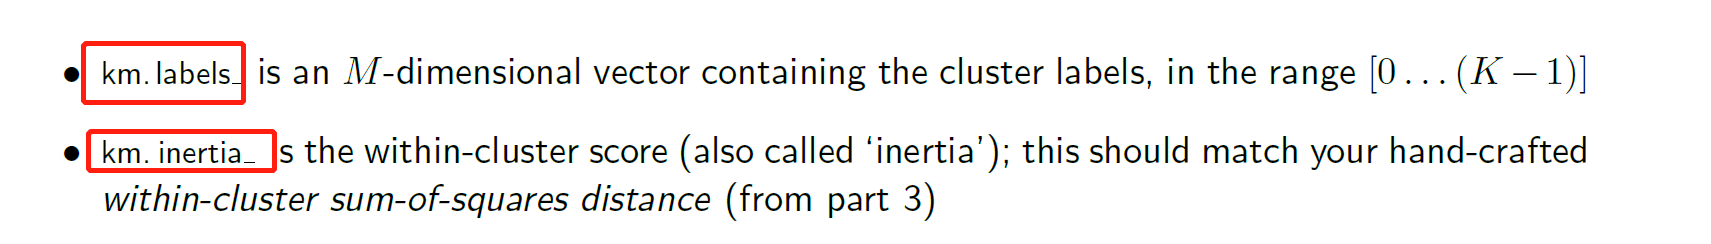

In [270]:
km.labels_

array([1, 0, 2, 2, 2, 1, 0, 0, 1, 1, 0, 0, 2, 0, 1, 0, 2, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 1, 2, 2, 0, 2, 0, 0,
       1, 0, 0, 2, 2, 0, 1, 1, 2, 0, 2, 2, 2, 0, 2, 1, 2, 0, 2, 0, 2, 1,
       1, 2, 0, 1, 1, 0, 2, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0, 0, 1, 1, 2, 0,
       0, 2, 1, 2, 0, 2, 2, 1, 0, 0, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 2,
       2, 1, 0, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 0, 2, 1, 1, 2, 2,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 0, 1, 0, 1,
       1, 0, 2, 2, 1, 2, 0, 2, 0, 0, 1, 0, 1, 2, 0, 0, 1, 0, 1, 2, 2, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       2, 0, 0, 1, 1, 0, 1, 0, 2, 1, 2, 2, 1, 2, 0, 2, 2, 0, 1, 1, 0, 2,
       1, 0, 0, 0, 2, 0, 1, 0, 1, 0, 1, 2, 1, 0, 2, 2, 1, 0, 0, 2, 2, 1,
       0, 1, 0, 2, 1, 0, 2, 2, 0, 1, 2, 1, 2, 1, 0, 1, 1, 1, 2, 0, 1, 0,
       0, 2, 2, 2, 2, 1, 0, 0, 0, 1, 0, 2, 2, 1, 1, 1, 0, 2, 2, 1, 2, 1,
       1, 1, 1, 0, 1, 2, 2, 2, 1, 0, 0, 1, 0, 0, 1,

In [271]:
km.inertia_

1890.8613849846865

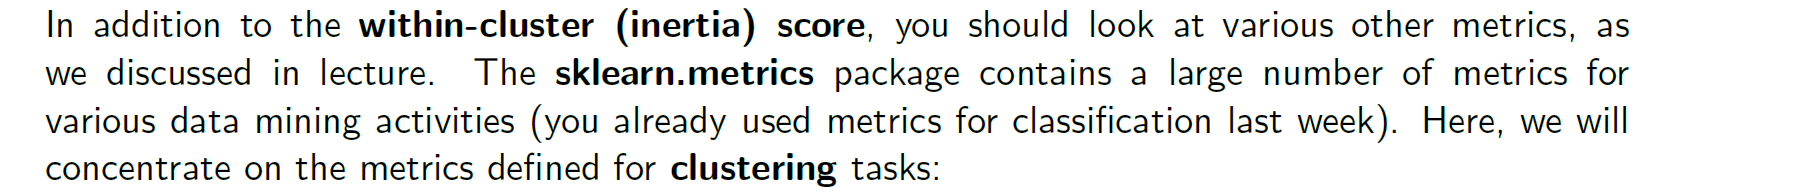

http://scikit-learn.org/stable/modules/classes.html#clustering-metrics

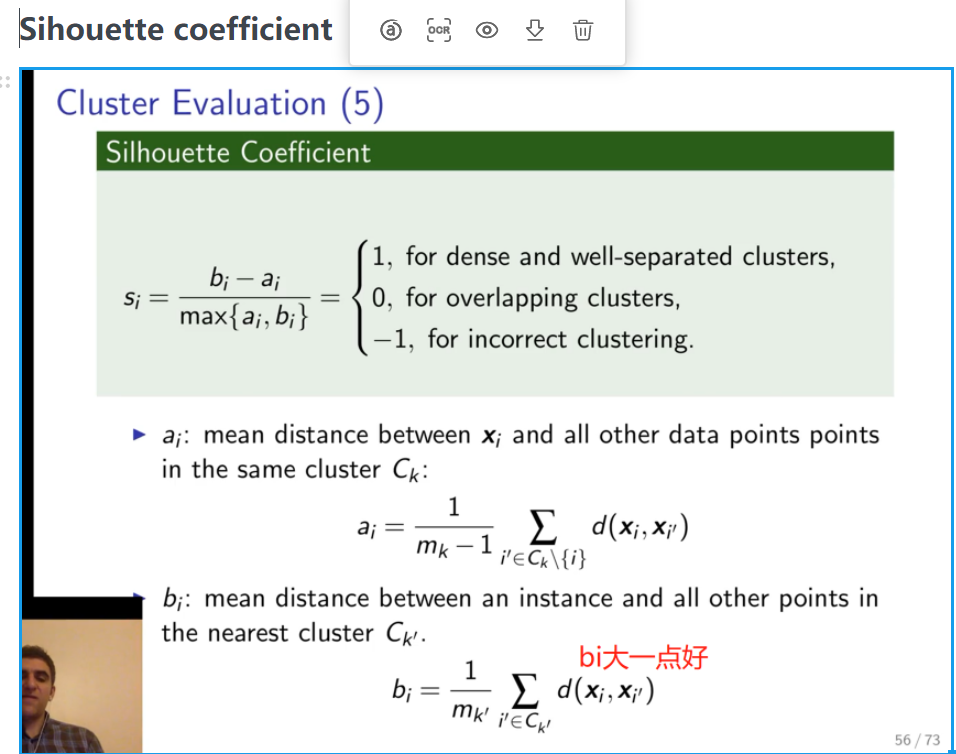

In [272]:
# compute the overall silhouette coefficient (return a scalar)
SC = metrics.silhouette_score(X,km.labels_,metric='euclidean')
SC

0.6458014296678243

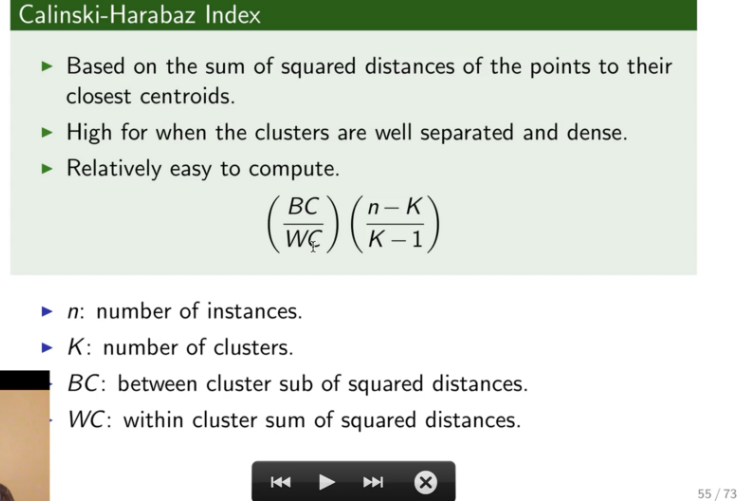

In [273]:
# compute ch score(return a scalar)
CH = metrics.calinski_harabasz_score(X,km.labels_)
CH

3208.226269081258

## Add computation of the Silhouette score and the Calinski-Harabasz score to your code.

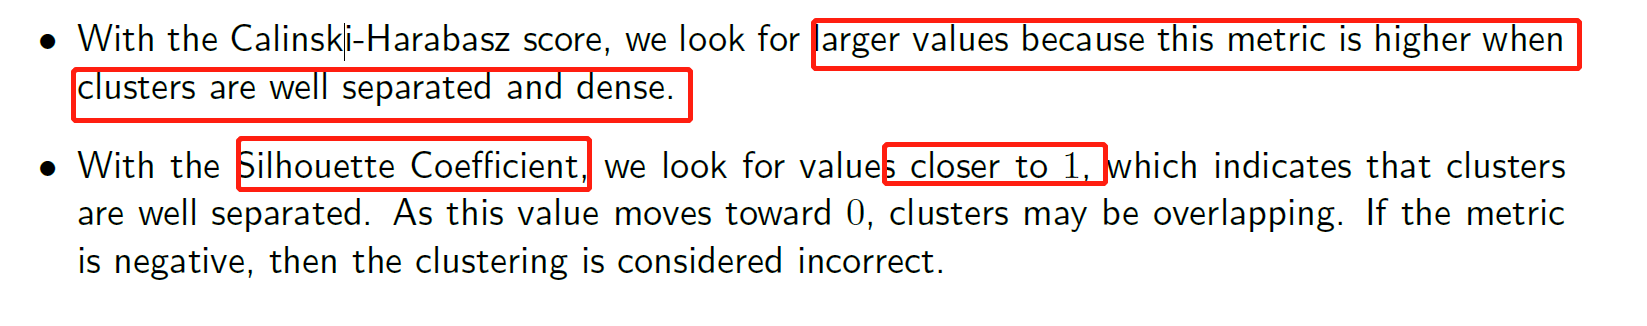

In [274]:
hand_computed_cH = (bc/wc)*(X.shape[0]-K)/(K-1)
hand_computed_cH

3208.1727416330687

## As previously, try different values of K


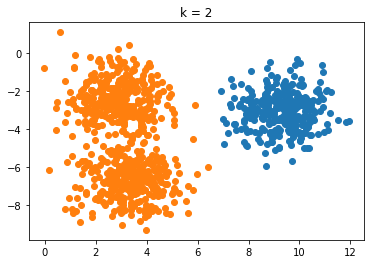

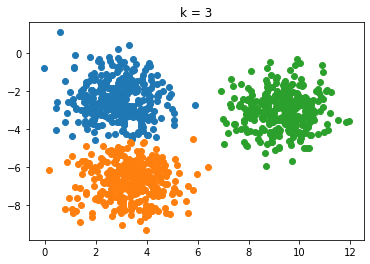

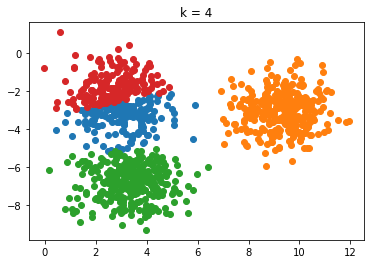

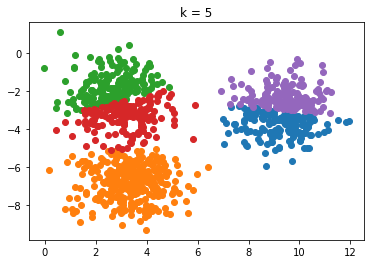

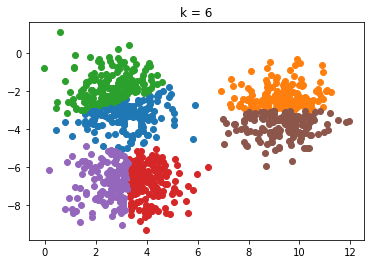

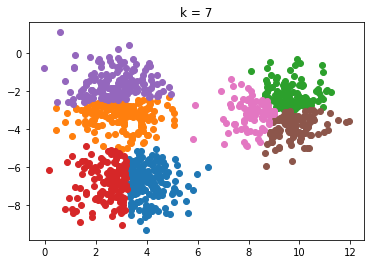

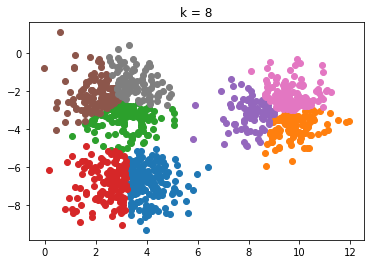

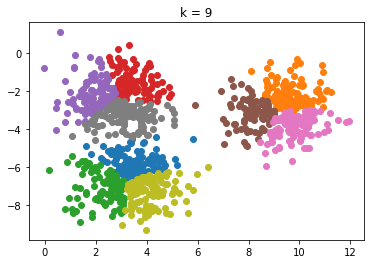

In [275]:
evaluation_df = pd.DataFrame(columns=['k','WC','BC','score','inertia','silhouette','calinski-harabasz','hand_compute_ch'])
bc_list = []
wc_list = []

for k in range(2,10):

    # k = 3
    epsion = 0.01

    centroid = []
    X_large, X_small, y_large, y_small = train_test_split(X,clusters,random_state=2)
    n = X.shape[0]
    random.seed(100)
    for i in range(k):
        centroid.append(X[random.randint(0,n-1)])
    centroid = np.array(centroid)

    previous_centroid = centroid

    while True:
        label = []
        for point in X:
            tmp = np.argmin(np.sum(np.square(point - centroid),axis=1))
            label.append(tmp)
        tmp_df = pd.DataFrame(X)
        tmp_df['y'] = label
        previous_centroid = centroid
        centroid = np.array(tmp_df.groupby('y').mean())
    #     print(abs(np.sum(previous_centroid - centroid)))


        wc = 0
        for i in range (previous_centroid.shape[0]):
    #         print(np.trace(np.matmul(np.array(tmp_df[tmp_df['y']==i][[0,1]] - previous_centroid[i]),np.array(tmp_df[tmp_df['y']==i][[0,1]] - previous_centroid[i]).transpose())))
#             wc +=np.trace(np.matmul(np.array(tmp_df[tmp_df['y']==i][[0,1]] - previous_centroid[i]),np.array(tmp_df[tmp_df['y']==i][[0,1]] - previous_centroid[i]).transpose()))
            wc +=(np.trace(np.matmul(np.array(tmp_df[tmp_df['y']==i][[0,1]] - previous_centroid[i]),np.array(tmp_df[tmp_df['y']==i][[0,1]] - previous_centroid[i]).transpose())))
#         print('wc = ',wc)

        bc = 0
        avg_centroid = np.mean(X,axis=0).reshape(1,2)
        bc_tmp = np.sum(np.square(previous_centroid - avg_centroid),axis=1)
        for i in range(bc_tmp.shape[0]):
            bc += bc_tmp[i]*tmp_df[tmp_df['y']==i].shape[0]
#         print('bc',bc)

        if abs(np.sum(previous_centroid - centroid))<epsion:
            break
    bc_list.append(bc)
    wc_list.append(wc)
    
    km = cluster.KMeans(n_clusters=k)
    # compute the clusters:
    km.fit(X)
    km.inertia_
    CH = metrics.calinski_harabasz_score(X,km.labels_)
    SC = metrics.silhouette_score(X,km.labels_,metric='euclidean')
    hand_computed_cH = (bc/wc)*(X.shape[0]-k)/(k-1)
    evaluation_df = evaluation_df.append({'k':k,'WC':wc,'BC':bc,'score':bc/wc,'inertia':km.inertia_,'silhouette':SC,'calinski-harabasz':CH,'hand_compute_ch':hand_computed_cH},ignore_index=True)
    tmp_df = pd.DataFrame(X)
    tmp_df['y'] = km.labels_
    for j in list(set(km.labels_)):
        plt.scatter(tmp_df[tmp_df['y']==j][0],tmp_df[tmp_df['y']==j][1])
    plt.title('k = {}'.format(k))
    plt.show()
    
    


In [276]:
evaluation_df

k           WC            BC      score      inertia  silhouette  \
0  2.0  5039.376768   9020.614339   1.790026  5039.376768    0.604568   
1  3.0  4840.671173   9219.319934   1.904554  1890.861385    0.645801   
2  4.0  4697.108137   9362.882970   1.993329  1644.992623    0.522614   
3  5.0  1543.794283  12547.399094   8.127637  1442.156226    0.387062   
4  6.0  1495.832940  12576.631084   8.407778  1242.348387    0.315423   
5  7.0  1287.438835  12772.552272   9.920900  1096.143069    0.332861   
6  8.0  1123.002515  12976.893770  11.555534   966.676739    0.331786   
7  9.0  1012.860893  13039.870009  12.874295   860.100016    0.327401   

   calinski-harabasz  hand_compute_ch  
0        1786.445730      1786.445730  
1        3208.226269       949.420199  
2        2505.874934       661.785306  
3        2176.784424      2021.749633  
4        2051.132717      1671.466240  
5        1957.438706      1641.908993  
6        1919.472786      1637.584250  
7        1901.100430      1594.803303

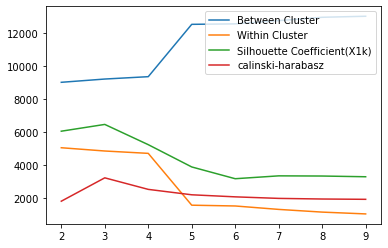

In [277]:
fig = plt.figure()
plt.plot(evaluation_df['k'],evaluation_df['BC'])
plt.plot(evaluation_df['k'],evaluation_df['WC'])
plt.plot(evaluation_df['k'],10000*evaluation_df['silhouette'])
plt.plot(evaluation_df['k'],evaluation_df['calinski-harabasz'])
plt.legend(['Between Cluster','Within Cluster','Silhouette Coefficient(X1k)','calinski-harabasz'],loc='upper right')
plt.show()

# 5 Write Agglomerative Clustering using scikit-learn

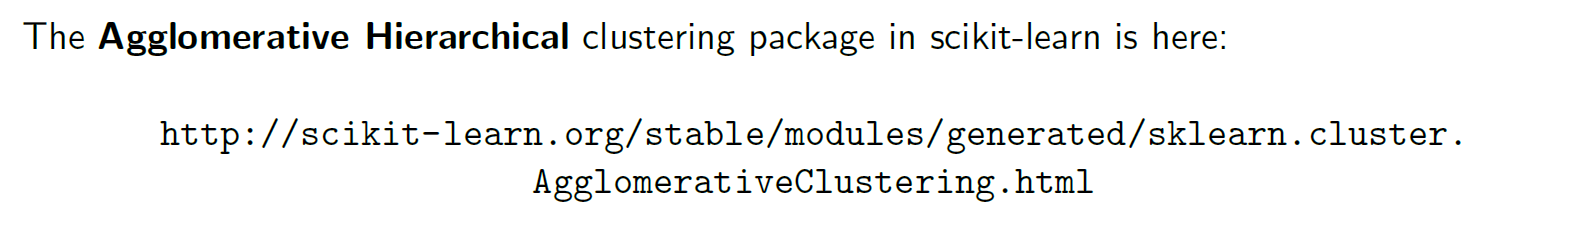

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

In [278]:
# initialise the agglomerative clustering object
ac = cluster.AgglomerativeClustering(n_clusters=K,linkage='average',affinity='euclidean')
# compute the cluster
ac.fit(X)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [279]:
ac.n_leaves_

1000

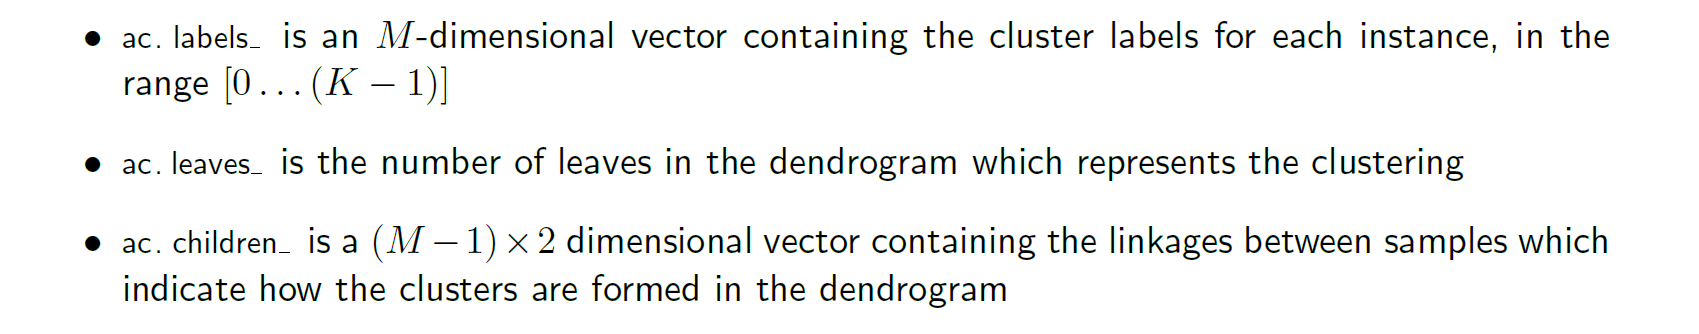

ac.n_leaves_

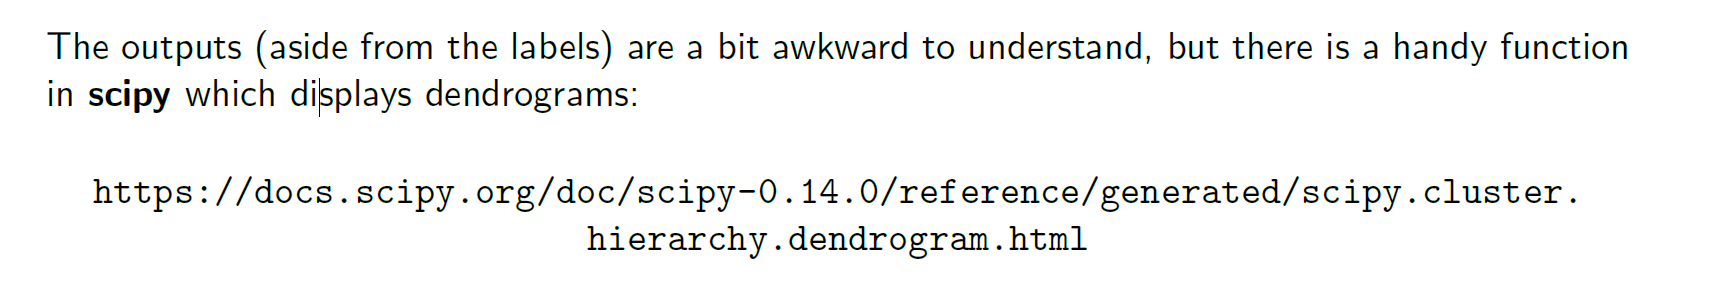

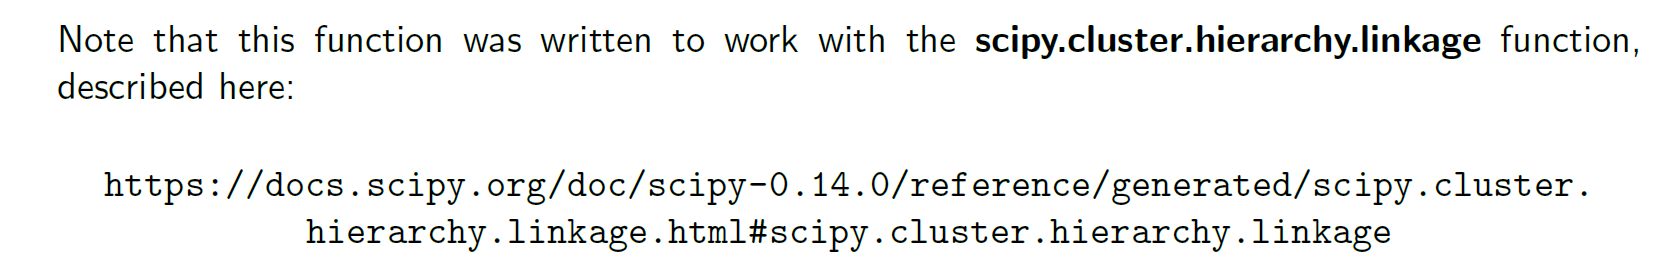

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage

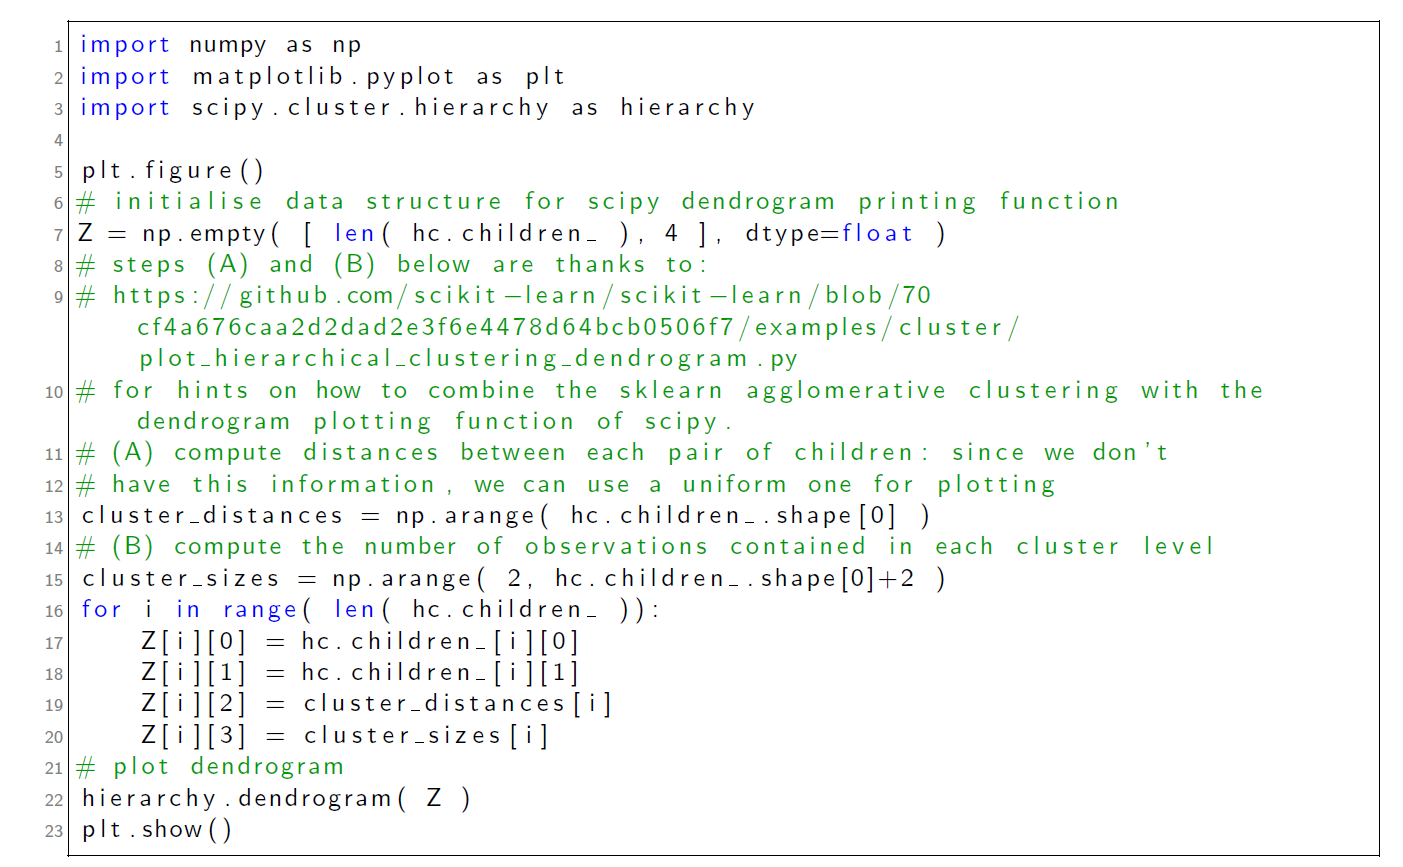

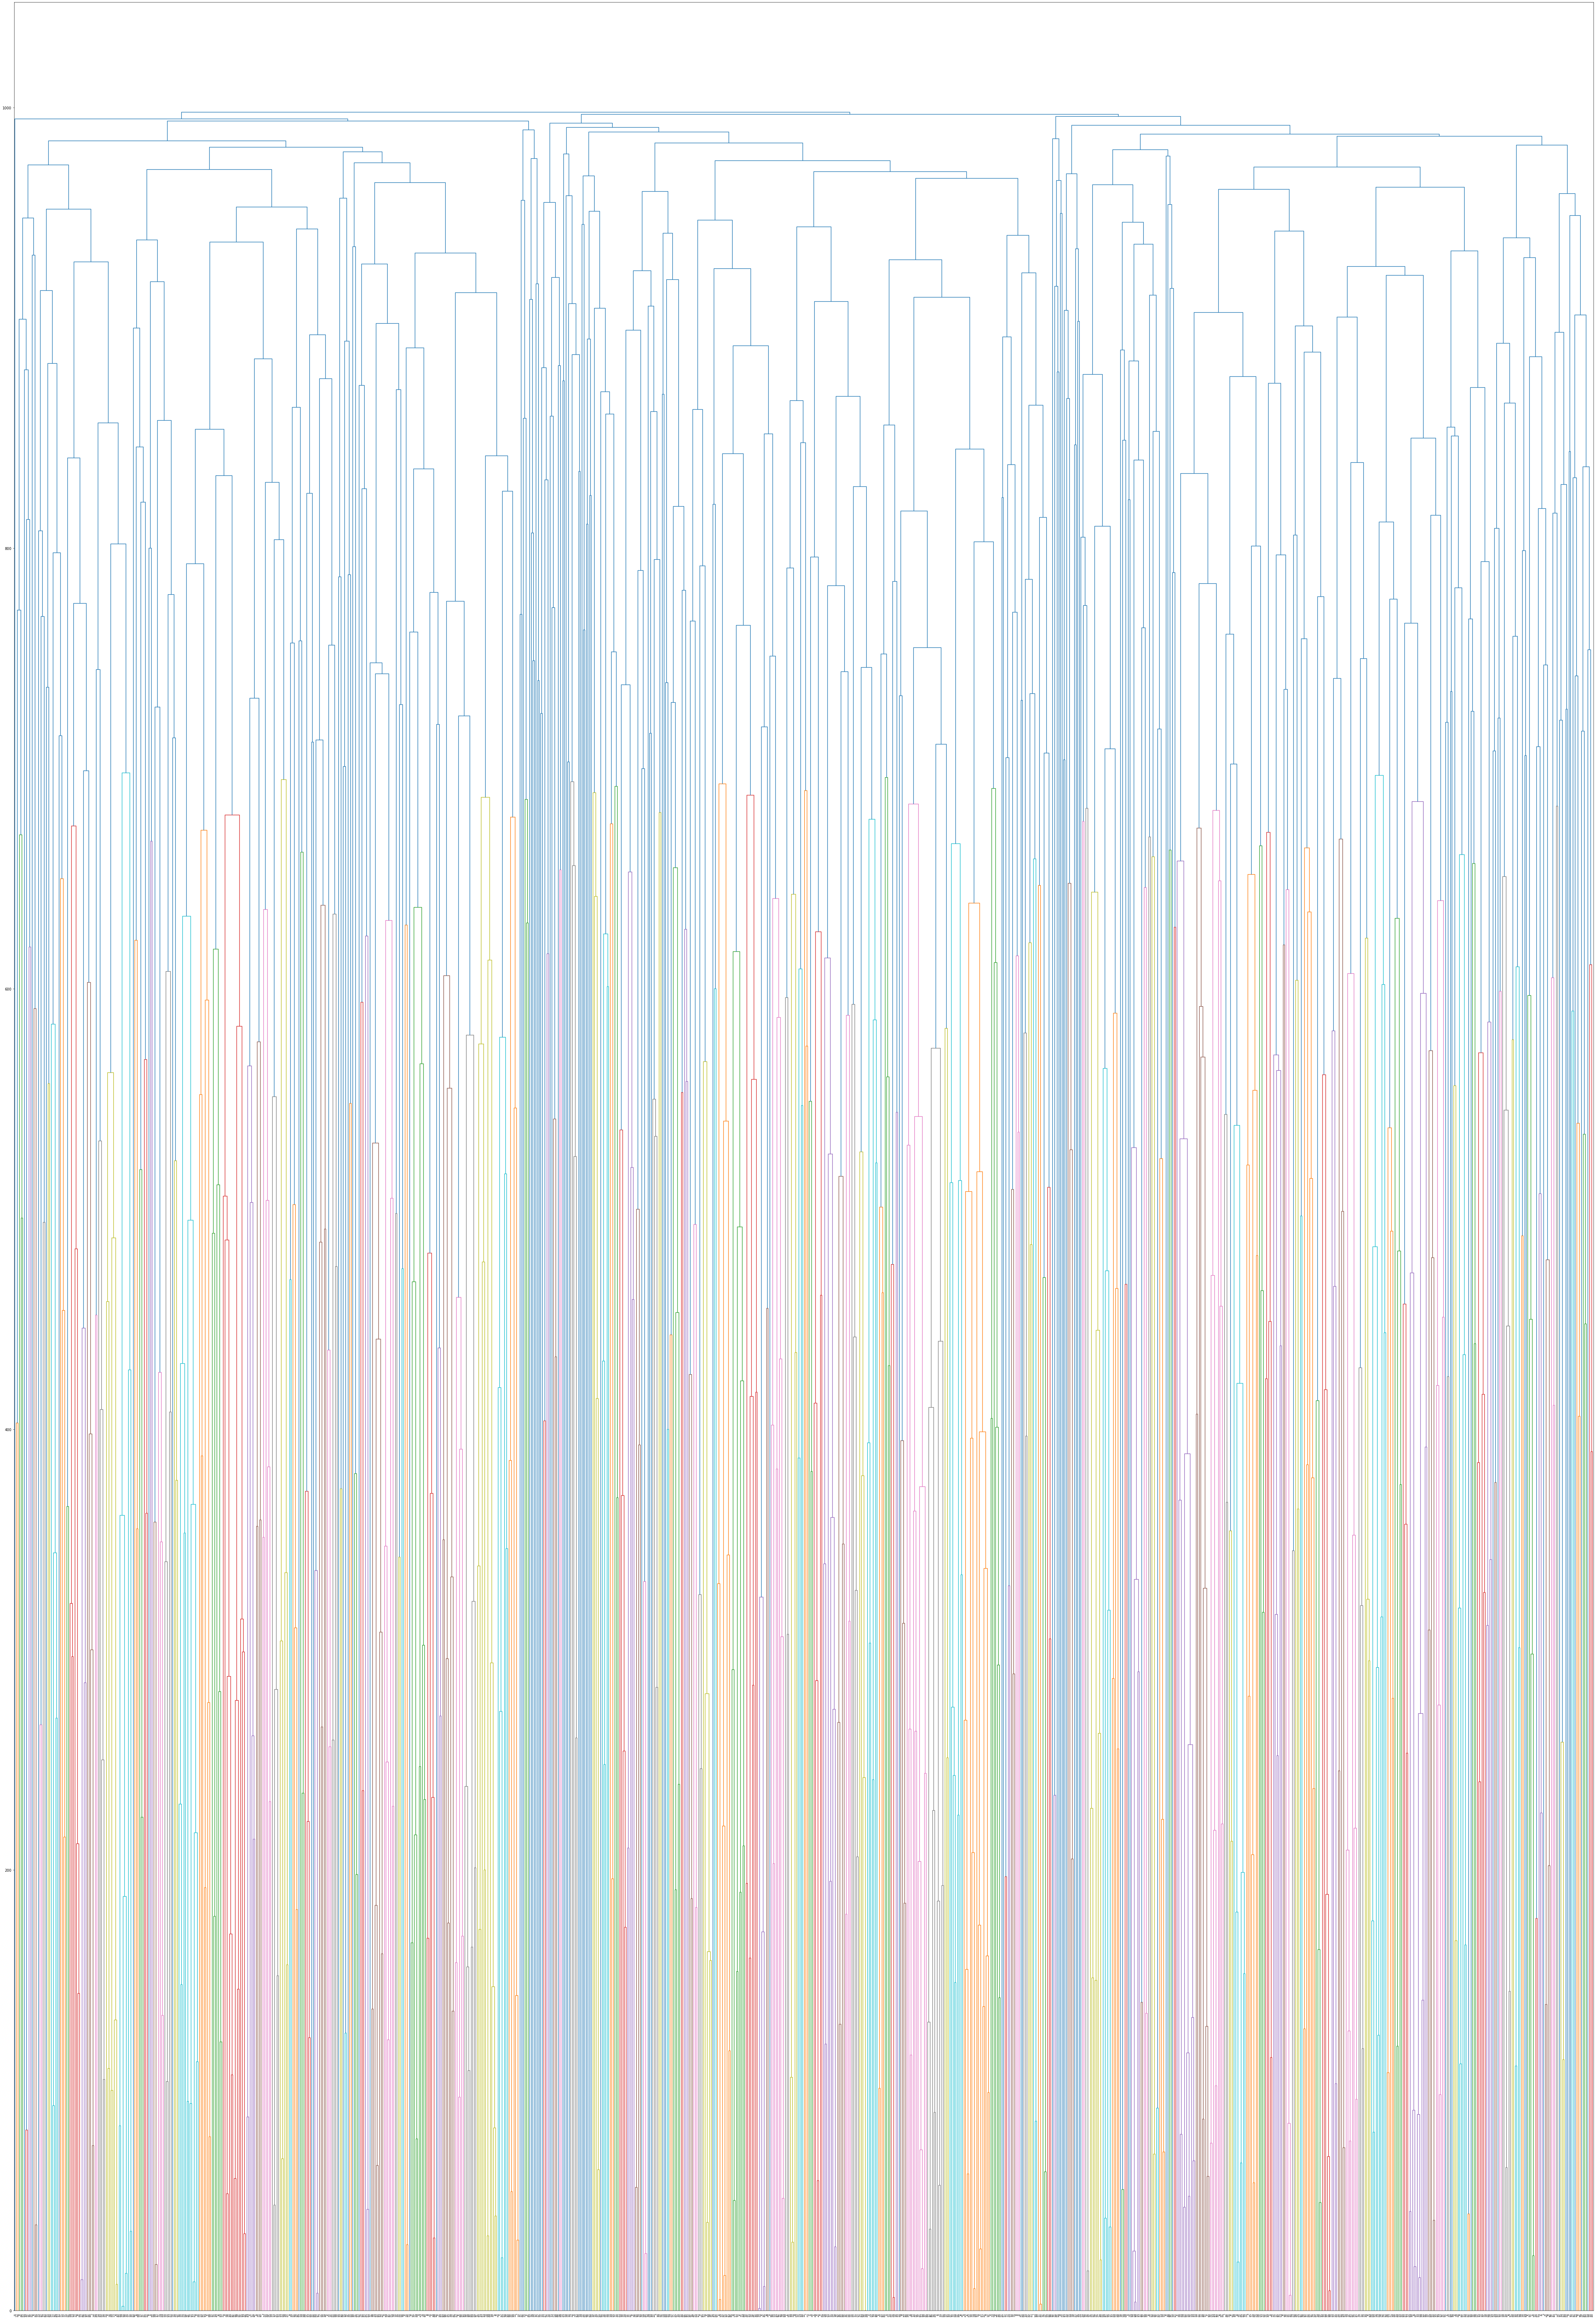

In [280]:
plt.figure(figsize=(80,120))
# initialise data structure for scipy dendrogram printing function
Z = np.empty([len(ac.children_),4],dtype=float)
# compute distances between each pair of children
cluster_distances = np.arange(ac.children_.shape[0])
# compute the number of observations contained in each cluster level
cluster_sizes = np.arange(2,ac.children_.shape[0]+2)
for i in range(len(ac.children_)):
    Z[i][0] = ac.children_[i][0]
    Z[i][1] = ac.children_[i][1]
    Z[i][2] = cluster_distances[i]
    Z[i][3] = cluster_sizes[i]
# plot
hierarchy.dendrogram(Z)
plt.show()

https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

In [281]:
hierarchy_df = pd.DataFrame(columns=['k','silhouette','calinski-harabasz'])

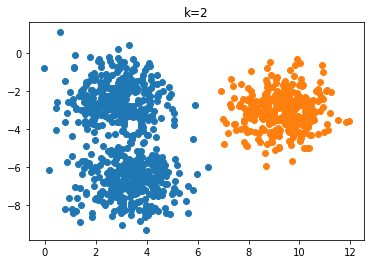

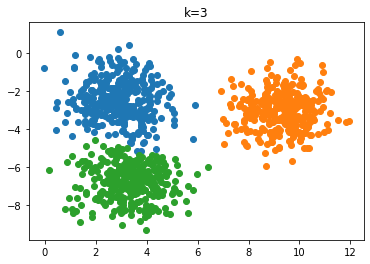

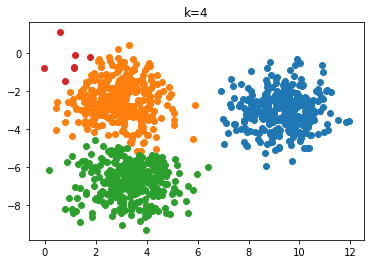

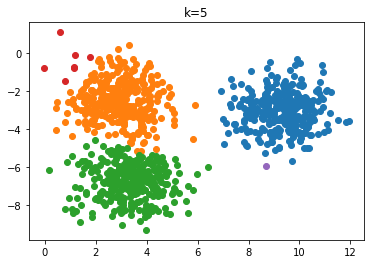

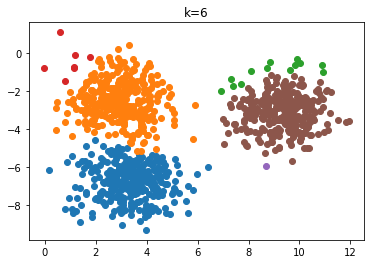

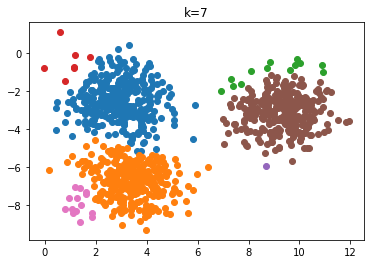

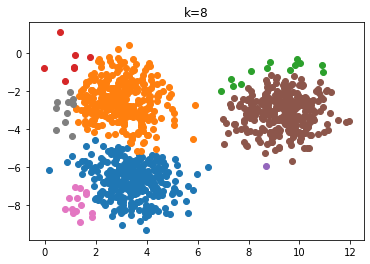

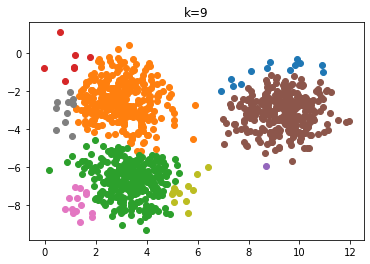

In [282]:
for i in range(2,10): 
    # initialise the agglomerative clustering object
    ac = cluster.AgglomerativeClustering(n_clusters=i,linkage='average',affinity='euclidean')
    # compute the cluster
    ac.fit(X)
    sc = metrics.silhouette_score(X,ac.labels_,metric='euclidean')
    ch = metrics.calinski_harabasz_score(X,ac.labels_)
    hierarchy_df = hierarchy_df.append({'k':i,'silhouette':sc,'calinski-harabasz':ch},ignore_index=True)
    
    tmp_df = pd.DataFrame(X)
    tmp_df['y'] = ac.labels_
    
    
    fig = plt.figure()
    for j in list(set(ac.labels_)):
        plt.scatter(tmp_df[tmp_df['y']==j][0],tmp_df[tmp_df['y']==j][1])
    plt.title('k={}'.format(i))
    plt.show()
    

In [283]:
hierarchy_df

k  silhouette  calinski-harabasz
0  2.0    0.604568        1786.445730
1  3.0    0.641779        3163.064750
2  4.0    0.565122        2182.487168
3  5.0    0.451049        1644.035158
4  6.0    0.404550        1365.458510
5  7.0    0.325042        1195.278383
6  8.0    0.282535        1061.050410
7  9.0    0.241478         964.548127

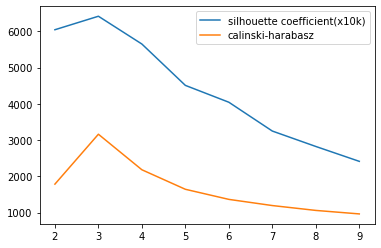

In [284]:
fig = plt.figure()
plt.plot(hierarchy_df['k'],10000*hierarchy_df['silhouette'])
plt.plot(hierarchy_df['k'],hierarchy_df['calinski-harabasz'])
plt.legend(['silhouette coefficient(x10k)','calinski-harabasz'])
plt.show()

# 6 Write DBSCAN with scikit-learn

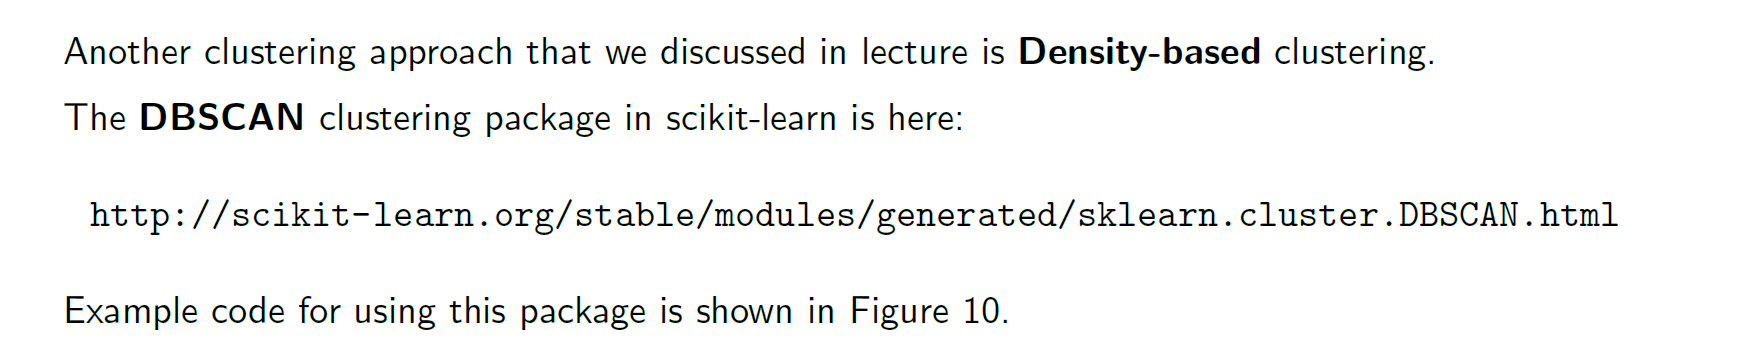

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

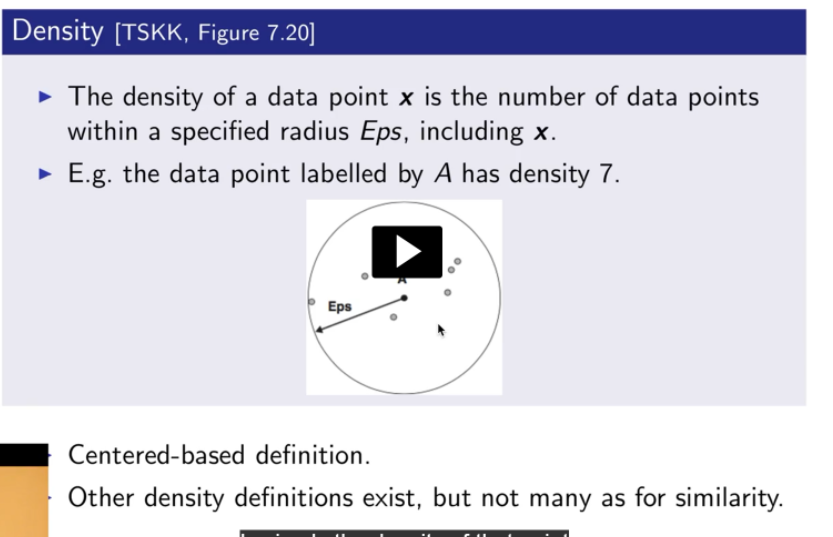

In [285]:
# initialise the DBSCAN clustering object
db = cluster.DBSCAN(eps=0.5,min_samples=1)
# compute the cluster
db.fit(X)

DBSCAN(min_samples=1)

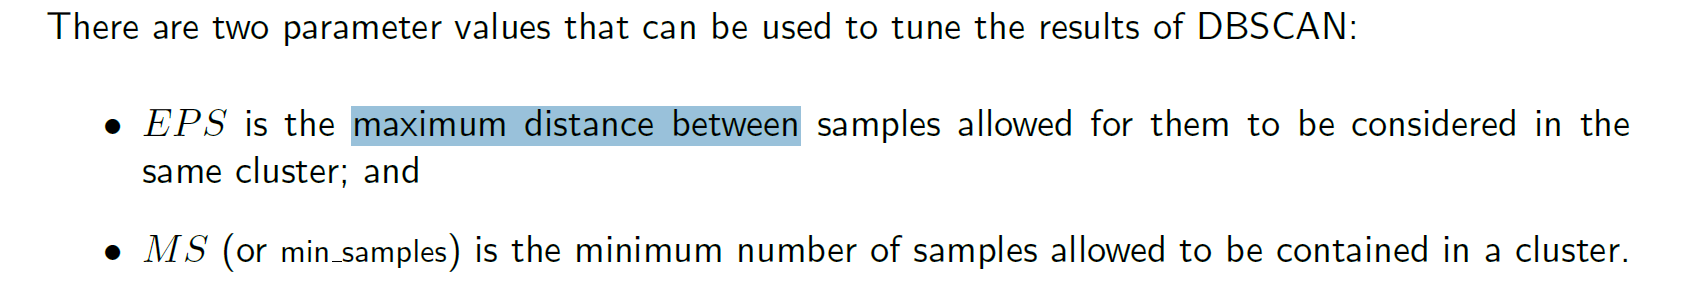

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html

In [286]:
# initialise the nearest neighbours 
nn = neighbors.NearestNeighbors(n_neighbors=2,metric='euclidean')
# fit the data to find the nearest neighbors to every instance
nn.fit(X)
# return the k nearest neighbors (k=n_neighbours argument)
dist,ind = nn.kneighbors(X,n_neighbors=2)

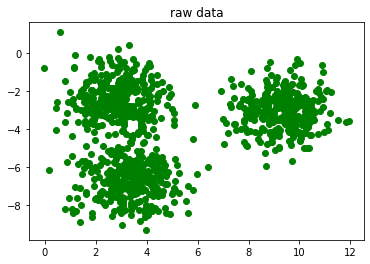

In [287]:
plt.figure()
plt.scatter(X[:,0],X[:,1],color='green')
plt.title('raw data')
plt.show()

In [244]:
# ind[0]

array([  0, 278], dtype=int64)

In [236]:
# X[278]

array([ 3.82722978, -1.36991837])

In [237]:
# X[0]

array([ 3.84520425, -1.14840331])

In [241]:
# np.sqrt((3.82722978 - 3.84520425)**2 + (-1.36991837 + 1.14840331)**2)

0.2222431177305261

In [239]:
# dist[0]

array([0.        , 0.22224312, 0.2696722 , 0.32727893, 0.34025624,
       0.39508672, 0.423453  , 0.42413115, 0.43809365, 0.47689991])

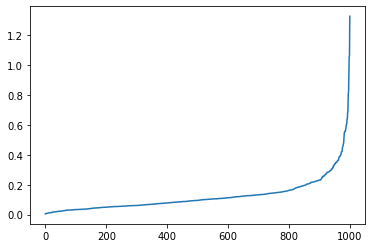

In [245]:
dist_list = list(dist[:,1])
dist_list = sorted(dist_list)
x = [i for i in range(dist.shape[0])]
fig = plt.figure()
plt.plot(x,dist_list)
plt.show()

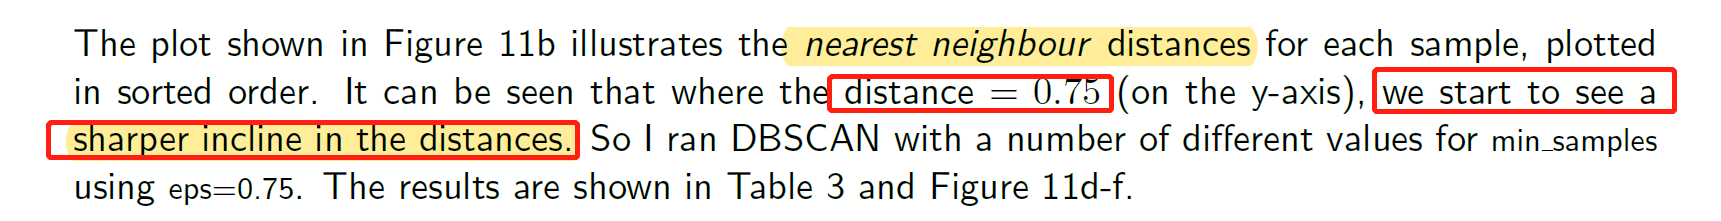

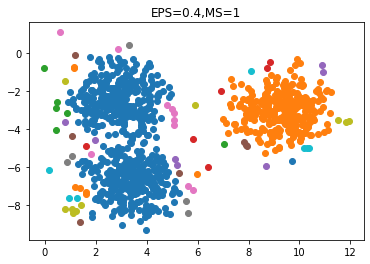

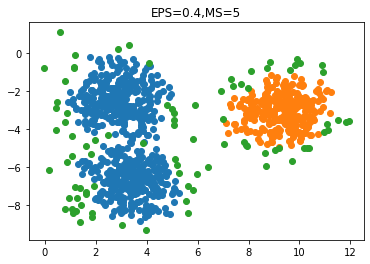

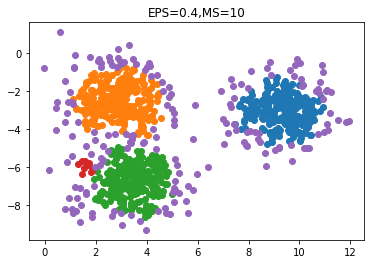

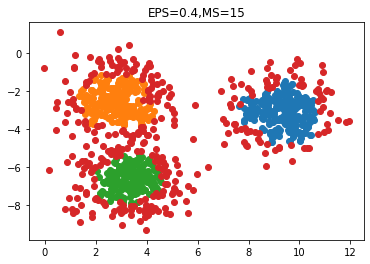

In [251]:
dbscan_df = pd.DataFrame(columns=['EPS','min_samples','K','silhouette','calinski-harabasz'])


for MS in [1,5,10,15]:
    # initialise the DBSCAN clustering object
    eps = 0.4
    # MS = 1
    db = cluster.DBSCAN(eps=eps,min_samples=MS)
    # compute the cluster
    db.fit(X)

    fig = plt.figure()
    tmp_df = pd.DataFrame(X)
    tmp_df['y'] = db.labels_
    for j in list(set(db.labels_)):
        plt.scatter(tmp_df[tmp_df['y']==j][0],tmp_df[tmp_df['y']==j][1])
    plt.title('EPS={},MS={}'.format(eps,MS))
    plt.show()
    
    
    sc = metrics.silhouette_score(X,db.labels_,metric='euclidean')
    ch = metrics.calinski_harabasz_score(X,db.labels_)
    k = len(set(db.labels_))
    dbscan_df = dbscan_df.append({'EPS':eps,'min_samples':MS,'K':k,'silhouette':sc,'calinski-harabasz':ch},ignore_index=True)
    
    

In [252]:
dbscan_df

EPS  min_samples     K  silhouette  calinski-harabasz
0  0.4          1.0  47.0   -0.330330          47.751708
1  0.4          5.0   3.0    0.432650         667.993567
2  0.4         10.0   5.0    0.349684         565.445353
3  0.4         15.0   4.0    0.301776         485.323519

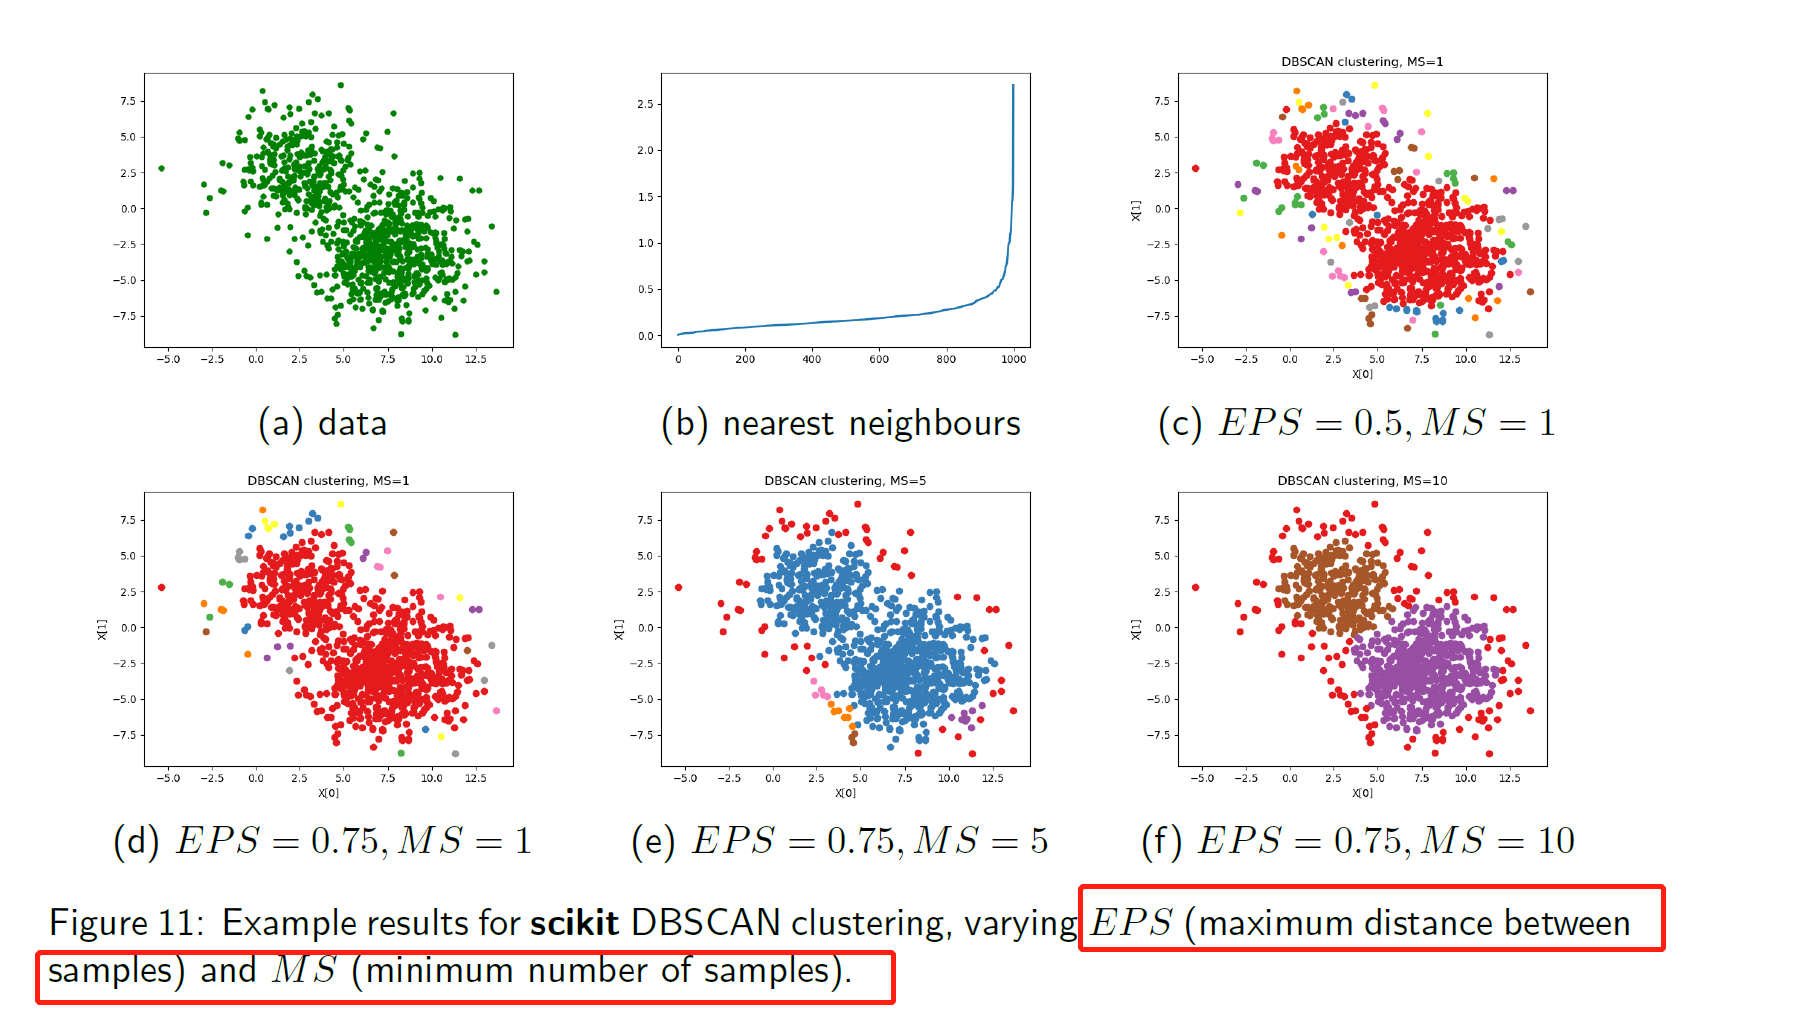

# the following parts are pnn

In [10]:
def tahn(x):
    return (decimal.Decimal(math.e)**decimal.Decimal(x) - decimal.Decimal(math.e)**decimal.Decimal(-x))/(decimal.Decimal(math.e)**decimal.Decimal(x) - decimal.Decimal(math.e)**decimal.Decimal(-x))

def tanh(x):
    return (math.e**x-math.e**(-x))/(math.e**x+math.e**(-x))
def sigmoid(x):
    return 1.0/(1.0+math.e**(-x))

In [11]:
import math
import decimal
decimal.Decimal('3.14')
math.e

2.718281828459045

In [12]:
W2 = np.array([[-1.1444,0.3115,-9.9812],
     [0.0106,11.5477,2.6479]])
Z2 = [0.9950754291306677,-0.9996088613306957,0.9930147295487092]
Z2 = np.array(Z2).reshape(3,1)
np.matmul(W2,Z2)

array([[-11.3616211 ],
       [ -8.90323175]])

In [13]:
sigmoid(np.matmul(W2,Z2))

array([[1.16333715e-05],
       [1.35930384e-04]])

In [14]:
tanh(2.8268)

0.9930147295487092

In [15]:
X = np.array([6.0436,2.8197,-2.2961])
X = tanh(X)

In [16]:
Z2 = np.array(X).reshape(3,1)
np.matmul(W2,Z2)

array([[8.9459041 ],
       [8.88169786]])

In [17]:
W2

array([[-1.14440e+00,  3.11500e-01, -9.98120e+00],
       [ 1.06000e-02,  1.15477e+01,  2.64790e+00]])

In [18]:
# sigmoid(np.matmul(W2,Z2))

In [19]:
# q4
W1 = [[-0.7057,1.9061,2.6605,-1.1359],
      [0.4900,1.9324,-0.4269,-5.1570],
      [0.9438,-5.4160,-0.3431,-0.2931]]
X1 = [[1,0,1,0],
     [0,1,0,1],
     [1,1,0,0]]
Z1 = np.matmul(np.array(W1),np.array(X1).transpose()) +np.transpose(np.array([4.8432,0.3973,2.1761]).reshape(1,3))
Z1

array([[ 6.798 ,  5.6134,  6.0436],
       [ 0.4604, -2.8273,  2.8197],
       [ 2.7768, -3.533 , -2.2961]])

In [20]:
A1 = tanh(Z1)
A1

array([[ 0.99999751,  0.99997338,  0.99998874],
       [ 0.43041017, -0.99302169,  0.99291518],
       [ 0.99228292, -0.99829417, -0.9799421 ]])

In [21]:
W2 = np.array([[-1.1444,0.3115,-9.9812],
     [0.0106,11.5477,2.6479]])

In [22]:
Z2 = np.matmul(W2,A1) +np.transpose(np.array([2.5230,2.6463]).reshape(1,2))
Z2

array([[ -8.39149863,  11.03347803,  11.4689041 ],
       [ 10.25461339, -11.45359996,  11.52799786]])

In [23]:
A2 = sigmoid(Z2)
A2

array([[2.26735732e-04, 9.99983848e-01, 9.99989550e-01],
       [9.99964806e-01, 1.06110932e-05, 9.99990150e-01]])

# Q5

In [113]:
def tanh_prime(x):
    return 4.0/((math.e**x+math.e**(-x))**2)

In [114]:
def sigmoid_prime(x):
    return sigmoid(x)*(1-sigmoid(x))

In [115]:
# Q5
# a
W1 = np.array([[ 0.5,  0,  0.2],
       [0.3,  -0.7,  0]])
X1 = np.array([0.1,0.9,1]).reshape(3,1)
Z1 = np.matmul(W1,X1)
Z1

array([[ 0.25],
       [-0.6 ]])

In [116]:
A1 = tanh(Z1)
A1

array([[ 0.24491866],
       [-0.53704957]])

In [117]:
W2 = np.array([[ 0.8,  1.6,  -0.4]])
W2

array([[ 0.8,  1.6, -0.4]])

In [118]:
A1 = np.r_[A1,np.array([1]).reshape(1,1)]
A1

array([[ 0.24491866],
       [-0.53704957],
       [ 1.        ]])

In [119]:
Z2 = np.matmul(W2,A1)
Z2

array([[-1.06334438]])

In [120]:
A2 = tanh(Z2)
A2

array([[-0.7869405]])

In [121]:
# b c
t = 0.5
da2 = -(t-A2[0][0])
dz2 = da2*tanh_prime(Z2[0][0])
dw2 = dz2*A1
db2 = dz2
da1 = dz2 * W2


da1 = da1[:,:2]
dz1 = da1.transpose()*tanh_prime(Z1)
dw1= dz1*X1.transpose()
db1 = dz1


In [122]:
dw1

array([[-0.03684632, -0.33161691, -0.36846324],
       [-0.05578428, -0.5020585 , -0.55784277]])

In [123]:
dw1[1][0]

-0.05578427748978585

In [124]:
# w21增量
dw1[1][0] * 0.25

-0.013946069372446463

In [125]:
# w21改变后的值
0.3 - (dw1[1][0] * 0.25)

0.31394606937244646

In [126]:
# m10对应的偏导
db2

-0.4899699690494823

In [127]:
# m10的增量
db2*0.25

-0.12249249226237058

In [128]:
# m10更新后的值
-0.4 -(db2*0.25)

-0.27750750773762944

In [129]:
# a
W1 = np.array([[ 0.5,  0,  0.2],
       [0.3 - (dw1[1][0] * 0.25),  -0.7,  0]])
X1 = np.array([0.1,0.9,1]).reshape(3,1)
Z1 = np.matmul(W1,X1)
Z1

array([[ 0.25      ],
       [-0.59860539]])

In [130]:
A1 = tanh(Z1)
A1

array([[ 0.24491866],
       [-0.53605645]])

In [131]:
W2 = np.array([[ 0.8,  1.6,  -0.4 -(db2*0.25)]])
W2

array([[ 0.8       ,  1.6       , -0.27750751]])

In [132]:
A1 = np.r_[A1,np.array([1]).reshape(1,1)]
A1

array([[ 0.24491866],
       [-0.53605645],
       [ 1.        ]])

In [133]:
Z2 = np.matmul(W2,A1)
Z2

array([[-0.9392629]])

In [134]:
# d
A2 = tanh(Z2)
A2

array([[-0.73488341]])

从-0.78到-0.73，朝着目标（0.5）在走了

# Q6

In [45]:
def gaussian(d,sigma):
#     print(-(d*d)/(2*(sigma**2)))
    return math.exp(-(d*d)/(2*(sigma**2)))
#     return math.e**(-(d*d)/(2*sigma*sigma))
    

In [46]:
gaussian(2,0.707)

0.018293520279467127

In [47]:
gaussian(1.414,0.707)

0.1353352832366127

In [48]:
gaussian(1,0.707)

0.36776832480248156

In [49]:
# gaussian(np.array([2,2]),np.array([0.707,0.707]))

In [50]:
gaussian(2,0.707)

0.018293520279467127